# Введение

Данный анализ представляет собой этап **предварительного анализа данных (EDA)**, направленный на изучение и подготовку данных для последующего машинного обучения. На основе предоставленных данных химических соединений предполагается разработка прогнозных моделей, которые помогут определить наиболее эффективные сочетания параметров для создания новых лекарственных препаратов.

Целью работы является провести тщательный анализ текущих параметров с использованием различных методов EDA, оценить качество данных, выявить возможные проблемы (например, пропуски, выбросы), а также понять взаимосвязи между ключевыми переменными: **IC50** (концентрация, при которой достигается 50% ингибирования), **CC50**и **SI**.

Работа включает следующие этапы:
1. Оценка структуры и качества данных.
2. Построение визуализаций для анализа распределений и взаимосвязей между переменными.
3. Подготовка данных для дальнейшего анализа и машинного обучения.

# План работы

1. **Загрузка и первичный анализ данных**


2. **Анализ пропущенных значений и очистка данных**


3. **Анализ выбросов**


4. **Статистический анализ данных**


5. **Анализ взаимосвязей между переменными**


6. **Предобработка и подготовка данных**


7. **Визуализация данных**


8. **Выводы**


---

**Цель работы** — провести комплексный анализ данных (EDA), выявить потенциальные проблемы в данных (пропуски, выбросы) и подготовить их для последующего применения в моделях машинного обучения.

## 1. Импорт библиотек

In [125]:
# Ипортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import skew, kurtosis
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

Импортированы все ключевые библиотеки для EDA: pandas, numpy, matplotlib, seaborn, missingno, статистические функции из scipy, а также инструменты для предобработки из sklearn.

## 2. Загрузка данных

In [126]:
# Загружим данные
file_path = '..\data\Данные_для_курсовои_Классическое_МО.xlsx'
xls = pd.ExcelFile(file_path)
df = xls.parse(xls.sheet_names[0])

In [127]:
# Наспроим пораметры отображения даблиц
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

# Установка максимальной ширины отображения (в символах)
pd.set_option('display.width', None) 

In [128]:
# Посмотрим загруженные данные 
print('Данные:')
print(display(df.head(20)))

Данные:


Unnamed: 0    IC50, mM     CC50, mM         SI  MaxAbsEStateIndex  \
0            0    6.239374   175.482382  28.125000           5.094096   
1            1    0.771831     5.402819   7.000000           3.961417   
2            2  223.808778   161.142320   0.720000           2.627117   
3            3    1.705624   107.855654  63.235294           5.097360   
4            4  107.131532   139.270991   1.300000           5.150510   
5            5   15.037911    30.075821   2.000000           5.758408   
6            6   18.908167    14.559288   0.770000           2.584472   
7            7   28.773087    23.593931   0.820000          13.821880   
8            8   50.057068   153.709268   3.070681          14.171614   
9            9    6.400847   400.906360  62.633333           6.135893   
10          10    4.185789    32.888344   7.857143           5.856558   
11          11   43.522458    72.435979   1.664336           2.589342   
12          12  208.368590   634.625148   3.045685           6.177277   
13          13    1.128847     5.769660   5.111111          13.400899   
14          14   10.636446    79.048135   7.431818          13.516829   
15          15  110.140615   110.140615   1.000000           2.741289   
16          16    3.228105    10.429264   3.230769           3.963175   
17          17   40.393066  1160.720297  28.735632           2.742324   
18          18  751.968277   751.968277   1.000000          12.215264   
19          19   64.130535   283.628863   4.422680           6.320833   

    MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0         5.094096           0.387225        0.387225  0.417362  42.928571   
1         3.961417           0.533868        0.533868  0.462473  45.214286   
2         2.627117           0.543231        0.543231  0.260923  42.187500   
3         5.097360           0.390603        0.390603  0.377846  41.862069   
4         5.150510           0.270476        0.270476  0.429038  36.514286   
5         5.758408           0.278083        0.278083  0.711012  28.600000   
6         2.584472           0.429649        0.429649  0.328539  36.564103   
7        13.821880           0.079845       -0.301260  0.217332  31.333333   
8        14.171614           0.019123       -0.411828  0.187781  29.157895   
9         6.135893           0.239226        0.239226  0.439915  36.400000   
10        5.856558           0.246833        0.246833  0.701837  28.440000   
11        2.589342           0.380221        0.380221  0.640283  33.250000   
12        6.177277           0.382774        0.382774  0.440789  38.000000   
13       13.400899           0.117366       -0.259257  0.677698  28.896552   
14       13.516829           0.115920       -0.260674  0.593976  28.733333   
15        2.741289           0.541351        0.541351  0.379591  43.400000   
16        3.963175           0.535939        0.535939  0.405038  44.068966   
17        2.742324           0.543543        0.543543  0.337233  42.387097   
18       12.215264           0.009695       -3.865747  0.739703  31.384615   
19        6.320833           0.300347        0.300347  0.562066  60.272727   

      MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0   384.652         340.300  384.350449                  158   
1   388.684         340.300  388.381750                  162   
2   446.808         388.344  446.458903                  186   
3   398.679         352.311  398.366099                  164   
4   466.713         424.377  466.334799                  184   
5   332.491         304.267  332.225249                  130   
6   528.869         472.421  528.443253                  212   
7   695.089         624.529  694.543729                  280   
8   763.123         696.595  762.512429                  300   
9   468.685         428.365  468.314064                  184   
10  334.463         308.255  334.204513                  130   
11  328.564         290.260  328.299877                  134   

None


Выполнили загрузку данных и вывели таблицу из датафрейма для первичного просмотра и правильности загрузки данных. Применены настройки отображения данных, удобные для анализа больших таблиц.

## 3. Первичный анализа данных

*Напишем функцию для анализа имеющихся данных*

In [129]:
def infoOut(df, details=False, missing_values=False):
    """
    Функция для получения информации о DataFrame.

    Args:
        df (pd.DataFrame): DataFrame для анализа.
        details (bool): Если True, возвращает расширенную информацию.
        missing_values (bool): Если True, возвращает информацию о пропущенных значениях.

    Returns:
        pd.DataFrame: DataFrame с информацией о столбцах.
    """
    dfInfo = df.columns.to_frame(name='Column')
    dfInfo['Missing Values'] = df.isnull().sum()
    dfInfo['%'] = round(df.isnull().sum() / len(df) * 100, 2)
    dfInfo['Dtype'] = df.dtypes

    # Подсчитываем общее количество дубликатов в dfFrame
    dfInfo['Duplicates'] = df.duplicated().sum()
    dfInfo['Unique Values'] = df.nunique()
    dfInfo['Total Rows'] = len(df)

    # Нормализуем данные: приводим к нижнему регистру и убираем пробелы
    df_normalized = df.astype(str).apply(lambda x: x.str.lower().str.strip())

    # Группируем по всем столбцам и считаем неявные дубликаты
    implicit_duplicates = df_normalized.groupby(list(df_normalized.columns)).size()

    # Записываем количество неявных дубликатов в dfInfo
    dfInfo['Implicit Duplicates'] = (implicit_duplicates > 1).sum()

    # Примерные значения для каждой колонки
    dfInfo['Example Values'] = df.apply(lambda x: ', '.join(map(str, x.unique()[:3].tolist())), axis=0)

    # Проверяем наличие дубликатов по выбранным столбцам, если их больше одного
    if df.shape[1] > 1:
        sample_columns = df.columns[1:3] # Выбираем первые два столбца для проверки
        dfInfo['Duplicates by Sample Columns'] = df.duplicated(subset=sample_columns).sum()
    else:
        dfInfo['Duplicates by Sample Columns'] = 0 # Если столбцов меньше двух, записываем 0

    dfInfo.reset_index(drop=True, inplace=True)

    if details:
        rangeIndex = df.index
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = df.memory_usage().sum()
        if missing_values:
            return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory, df.isnull().sum(), dfInfo['Duplicates']
        else:
            return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo

Выведем аналитическую табличку данных `df`

In [130]:
# Анализируем df
print("Df DataFrame:")
df_info = infoOut(df, details=True, missing_values=True)
dfInfo = df_info[0]
df_totalColumns = df_info[2]
df_totalMemory = df_info[4]

# Добавляем индикатор дубликатов для каждой строки в dfFrame
dfInfo['Duplicate Rows'] = df.duplicated()

display(dfInfo)
miss_column = dfInfo[dfInfo['Missing Values'] > 0]
display(f"Total Columns: {df_totalColumns}")
print(f"Memory Usage: {df_totalMemory} bytes")
print(f"Количество столбцов с пропусками: {len(miss_column)}: \n{miss_column['Column'].to_string(index=False)}")
# Подсчитваем количество каждой группы по столбцу Dtype
dtype_counts = dfInfo['Dtype'].value_counts()

print("\nКоличество значений по типам данных")
print(dtype_counts)

Df DataFrame:


Column  Missing Values    %    Dtype  Duplicates  \
0                  Unnamed: 0               0  0.0    int64           0   
1                    IC50, mM               0  0.0  float64           0   
2                    CC50, mM               0  0.0  float64           0   
3                          SI               0  0.0  float64           0   
4           MaxAbsEStateIndex               0  0.0  float64           0   
5              MaxEStateIndex               0  0.0  float64           0   
6           MinAbsEStateIndex               0  0.0  float64           0   
7              MinEStateIndex               0  0.0  float64           0   
8                         qed               0  0.0  float64           0   
9                         SPS               0  0.0  float64           0   
10                      MolWt               0  0.0  float64           0   
11             HeavyAtomMolWt               0  0.0  float64           0   
12                 ExactMolWt               0  0.0  float64           0   
13        NumValenceElectrons               0  0.0    int64           0   
14        NumRadicalElectrons               0  0.0    int64           0   
15           MaxPartialCharge               3  0.3  float64           0   
16           MinPartialCharge               3  0.3  float64           0   
17        MaxAbsPartialCharge               3  0.3  float64           0   
18        MinAbsPartialCharge               3  0.3  float64           0   
19           FpDensityMorgan1               0  0.0  float64           0   
20           FpDensityMorgan2               0  0.0  float64           0   
21           FpDensityMorgan3               0  0.0  float64           0   
22                BCUT2D_MWHI               3  0.3  float64           0   
23               BCUT2D_MWLOW               3  0.3  float64           0   
24               BCUT2D_CHGHI               3  0.3  float64           0   
25               BCUT2D_CHGLO               3  0.3  float64           0   
26              BCUT2D_LOGPHI               3  0.3  float64           0   
27             BCUT2D_LOGPLOW               3  0.3  float64           0   
28                BCUT2D_MRHI               3  0.3  float64           0   
29               BCUT2D_MRLOW               3  0.3  float64           0   
30                     AvgIpc               0  0.0  float64           0   
31                   BalabanJ               0  0.0  float64           0   
32                    BertzCT               0  0.0  float64           0   
33                       Chi0               0  0.0  float64           0   
34                      Chi0n               0  0.0  float64           0   
35                      Chi0v               0  0.0  float64           0   
36                       Chi1               0  0.0  float64           0   
37                      Chi1n               0  0.0  float64           0   
38                      Chi1v               0  0.0  float64           0   
39                      Chi2n               0  0.0  float64           0   
40                      Chi2v               0  0.0  float64           0   
41                      Chi3n               0  0.0  float64           0   
42                      Chi3v               0  0.0  float64           0   
43                      Chi4n               0  0.0  float64           0   
44                      Chi4v               0  0.0  float64           0   
45              HallKierAlpha               0  0.0  float64           0   
46                        Ipc               0  0.0  float64           0   
47                     Kappa1               0  0.0  float64           0   
48                     Kappa2               0  0.0  float64           0   
49                     Kappa3               0  0.0  float64           0   
50                  LabuteASA               0  0.0  float64           0   
51                  PEOE_VSA1               0  0.0  float64           0   
52                 PEOE_VSA10               0  0

'Total Columns: 214'

Memory Usage: 1713844 bytes
Количество столбцов с пропусками: 12: 
   MaxPartialCharge
   MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
        BCUT2D_MWHI
       BCUT2D_MWLOW
       BCUT2D_CHGHI
       BCUT2D_CHGLO
      BCUT2D_LOGPHI
     BCUT2D_LOGPLOW
        BCUT2D_MRHI
       BCUT2D_MRLOW

Количество значений по типам данных
Dtype
int64      107
float64    107
Name: count, dtype: int64


Создана обширная функция infoOut() для комплексного анализа DataFrame, включая пропуски, дубликаты, уникальные значения и даже неявные дубликаты

Большинство колонок 0 пропущенных значений, кроме следующих 12 столбцов: MaxPartialCharge, MinPartialCharge, MaxAbsPartialCharge, MinAbsPartialCharge, BCUT2D_MWHI, BCUT2D_MWLOW, BCUT2D_CHGHI, BCUT2D_CHGLO, BCUT2D_LOGPHI, BCUT2D_LOGPLOW, BCUT2D_MRHI, BCUT2D_MRLOW, что является положительным аспектом в процентом соотношении где количество столбцов с пропусками составляет 5% и незначительных количество пропущенных значений в самих столбцах.

Все колоноки представлены в числовом формате (float64 и int64), что позволяет проводить количественный анализ и применять математические операции. 

В наборе данных не выявлено дубликатов, что свидетельствует о целостности и качестве данных. 

Количество уникальных значений варьируется от 1 до 1001, что указывает на разнообразие в данных. Это разнообразие может способствовать более качественному обучению моделей, хотя важные колонки с малым числом уникальных значений могут потребовать дополнительного внимания.

Всего в данном наборе данных 1001 строка, что обеспечивает достаточный объём для анализа и построения модели. Это подходит для применения многих методов машинного обучения, так как количество записей соответствует минимальным требованиям.

Посмотрим статистику по числовым столбцам

In [131]:
numeric_columns_df = df.select_dtypes(include=['float64', 'int64']).columns

print("Статистика для df:\n")
display(df[numeric_columns_df].describe())

Статистика для df:



Unnamed: 0     IC50, mM     CC50, mM            SI  MaxAbsEStateIndex  \
count  1001.000000  1001.000000  1001.000000   1001.000000        1001.000000   
mean    500.000000   222.805156   589.110728     72.508823          10.831637   
std     289.108111   402.169734   642.867508    684.482739           3.307505   
min       0.000000     0.003517     0.700808      0.011489           2.321942   
25%     250.000000    12.515396    99.999036      1.433333           9.252350   
50%     500.000000    46.585183   411.039342      3.846154          12.179236   
75%     750.000000   224.975928   894.089176     16.566667          13.167843   
max    1000.000000  4128.529377  4538.976189  15620.600000          15.933463   

       MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex          qed  \
count     1001.000000        1001.000000     1001.000000  1001.000000   
mean        10.831637           0.180681       -0.967237     0.580412   
std          3.307505           0.168710        1.588036     0.212230   
min          2.321942           0.000039       -6.992796     0.059567   
25%          9.252350           0.051073       -1.334487     0.442842   
50%         12.179236           0.124606       -0.419485     0.634981   
75%         13.167843           0.291020        0.061754     0.742483   
max         15.933463           1.374614        1.374614     0.947265   

               SPS        MolWt  HeavyAtomMolWt   ExactMolWt  \
count  1001.000000  1001.000000     1001.000000  1001.000000   
mean     29.487989   348.262234      324.469003   347.940606   
std      12.742749   126.946370      121.694134   126.807891   
min       9.416667   110.156000      100.076000   110.073165   
25%      18.486486   264.321000      244.212000   264.136159   
50%      29.290323   315.457000      293.183000   315.219829   
75%      38.750000   409.283000      385.258000   408.166077   
max      60.272727   904.777000      856.393000   904.248467   

       NumValenceElectrons  NumRadicalElectrons  MaxPartialCharge  \
count          1001.000000               1001.0        998.000000   
mean            132.115884                  0.0          0.235749   
std              46.701805                  0.0          0.129429   
min              42.000000                  0.0         -0.016706   
25%             102.000000                  0.0          0.118380   
50%             120.000000                  0.0          0.250661   
75%             152.000000                  0.0          0.335693   
max             350.000000                  0.0          0.572596   

       MinPartialCharge  MaxAbsPartialCharge  MinAbsPartialCharge  \
count        998.000000           998.000000           998.000000   
mean          -0.407436             0.415741             0.227534   
std            0.075974             0.071951             0.119641   
min           -0.744036             0.085007             0.002020   
25%           -0.477880             0.361390             0.116849   
50%           -0.393567             0.426056             0.250661   
75%           -0.354484             0.477880             0.330890   
max           -0.085007             0.744036             0.507387   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  \
count       1001.000000       1001.000000       1001.000000   998.000000   
mean           1.143163          1.824615          2.418738    23.196621   
std            0.241080          0.320613          0.396290    14.529014   
min            0.222222          0.377778          0.577778    14.513946   
25%            1.000000          1.634146          2.243902    16.366967   
50%            1.153846          1.880000          2.500000    16.564091   
75%            1.333333          2.050000          2.689655    32.092047   
max            1.750000          2.625000          3.266667   126.912704   

       BCUT2D_MWLOW  BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  \
count    998.000000    998.000000    998.000000 

Все столбцы содержат 1001 наблюдение, что свидетельствует о полноте данных без недостающих значений. Эта целостность данных крайне важна для обеспечения точности анализа и построения моделей.

- `IC50`: Среднее значение составляет приблизительно 222.81 с диапазоном от 0.0035 до 4128.53, показывая значительное расхождение (стандартное отклонение ~402.17). Это указывает на высокую изменчивость значений этой переменной.

- `CC50`: Среднее значение 589.11 и максимальное значение 4538.98 также подчеркивают широкий диапазон и потенциальное наличие выбросов, что важно учитывать при анализе.

- `SI`: Среднее значение около 41.28, что подразумевает высокую изменчивость с максимальными значениями до 4538.98.

- Признаки, касающиеся знаний о состоянии молекул, такие как MaxAbsEStateIndex и MaxEStateIndex, имеют значительные варьирования, что может свидетельствовать о разнообразии молекул.

- Данные о зарядах (например, `MaxPartialCharge`, `MinPartialCharge`) показывают наличие достаточного количества значений и помогают в дальнейших вычислениях.

Наблюдается отклонения стандартных отклонений по сравнению со средними значениями.

Посмотрим распределение данных с числовыми признаками

In [132]:
# Переименование столбцов
df.rename(columns={'IC50, mM': 'IC50', 'CC50, mM': 'CC50'}, inplace=True)

In [133]:
target_cols = ['IC50', 'CC50', 'SI']

# Посмотрим целевые переныые
print("\nОписание целевых переменных:")
display(df[target_cols].describe().T)


Описание целевых переменных:


count        mean         std       min        25%         50%  \
IC50  1001.0  222.805156  402.169734  0.003517  12.515396   46.585183   
CC50  1001.0  589.110728  642.867508  0.700808  99.999036  411.039342   
SI    1001.0   72.508823  684.482739  0.011489   1.433333    3.846154   

             75%           max  
IC50  224.975928   4128.529377  
CC50  894.089176   4538.976189  
SI     16.566667  15620.600000

**IC50:**

- Общее количество наблюдений: 1001.

- Среднее значение: 222.81, средний уровень ингибирования для данной метрики.

- Стандартное отклонение: 402.17, высокая изменчивость в значениях IC50. Широкий диапазон значений (от 0.0035 до 4128.53) подразумевает наличие значительных выбросов и разнообразие среди исследуемых соединений.

- Квартили: 25% и 75%, 25% наблюдений находятся ниже 12.52, а 75% — ниже 224.98, что показывает на высокую изменчивость и возможные выбросы.

**CC50:**

- Также содержит 1001 наблюдение, с средним значением 589.11.

- Стандартное отклонение: 642.87 указывает на некоторые значительные различия между значениями (похожая ситуация с IC50).

- Диапазон значений: от 0.70 до 4538.98, подтверждает наличие значительных выбросов. Это также может указывать на разные уровни токсичности среди соединений.

- Квартильные значения: 25% находятся ниже 99.99, а 75% — ниже 894.09, что может быть полезно при построении моделей для оценки токсичности.

**SI (соотношение между IC50 и CC50):**

- Имеет аналогичное количество наблюдений (1001) и среднее значение 72.51.

- Стандартное отклонение: 684.48, большая изменчивость. Диапазон значений от 0.0115 до 15620.60 демонстрирует широкий спектр активности, где значительное количество соединений может обладать высокой активностью при низких концентрациях.

- Квартильные значения: 25% ниже 1.43, а 75% — ниже 16.57, дисперсия в данных и потенциальное наличие соединений с высокой активностью.

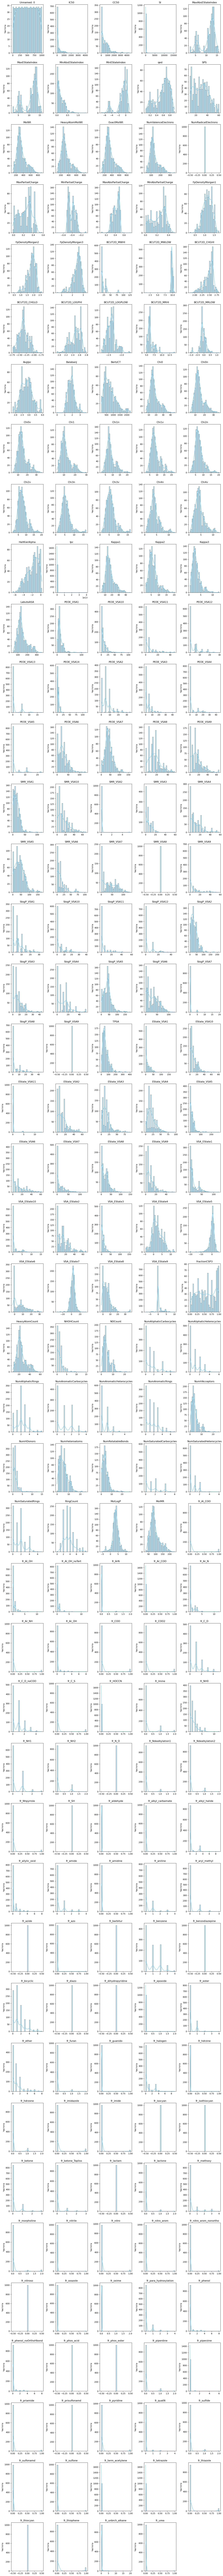

In [134]:
# Напишем фукнцию для визуализации распределения данных
def plot_numerical_distribution(df, title_prefix='', n_cols=5):
    # Получаем имена числовых столбцов, удаляем пустые столбцы
    numeric_cols = df.select_dtypes(include=['number'])
    numeric_cols = numeric_cols.dropna(axis=1, how='all').columns.tolist()

    # Определяем количество строк
    n_rows = int((len(numeric_cols)+n_cols-1)//n_cols)

    # Создаем фигуру с сеткой осей
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

    # Обрабатываем оси, если создали одну ось
    if n_rows == 1 and n_cols == 1:
        axes = [axes]  # обернём в список, если одна ось
    else:
        axes = axes.flatten()  # приведём к плоскому массиву

    # Перебираем каждый числовой столбец
    for i, col in enumerate(numeric_cols):
        ax = axes[i]

        # Рисуем гистограмму с KDE
        sns.histplot(data=df[col], kde=True, bins=30, color='skyblue', ax=ax)

        # Оформляем заголовок и подписи осей
        ax.set_title(f"{title_prefix}{col}")
        ax.set_xlabel('')
        ax.set_ylabel('Частота')

    # Скрываем лишние оси
    num_axes = len(numeric_cols)
    total_axes = len(axes)
    if num_axes < total_axes:
        for j in range(num_axes, total_axes):
            axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Используем функцию для df
plot_numerical_distribution(df)

Многие признаки (особенно химические дескрипторы) имеют асимметричное распределение, характерное для данных химической активности.
Целевые переменные IC50, CC50, SI до очистки имют длинные правые хвосты (положительная асимметрия), что говорит о наличии экстремальных значений (выбросов).

## 4. Предобработка

In [135]:
# Удалим значение с еденичным уникальным значением
df = df.loc[:, df.nunique() > 1]

In [136]:
# Распределим данные на числовые и категориальные
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

# Убираем целевые переменные из числовых признаков
numerical_features = [f for f in numerical_features if f not in target_cols]

Выбраны числовые и категориальные признаки. Все данные оказались числовыми, что облегчает моделирование.


## 5. Анализ пропущенных значений

Столбцы с пропущенными значениями (12):
MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64

Процент пропущенных значений по столбцам:
MaxPartialCharge       0.03
MinPartialCharge       0.03
MaxAbsPartialCharge    0.03
MinAbsPartialCharge    0.03
BCUT2D_MWHI            0.03
BCUT2D_MWLOW           0.03
BCUT2D_CHGHI           0.03
BCUT2D_CHGLO           0.03
BCUT2D_LOGPHI          0.03
BCUT2D_LOGPLOW         0.03
BCUT2D_MRHI            0.03
BCUT2D_MRLOW           0.03
dtype: float64

Визуализация пропусков:


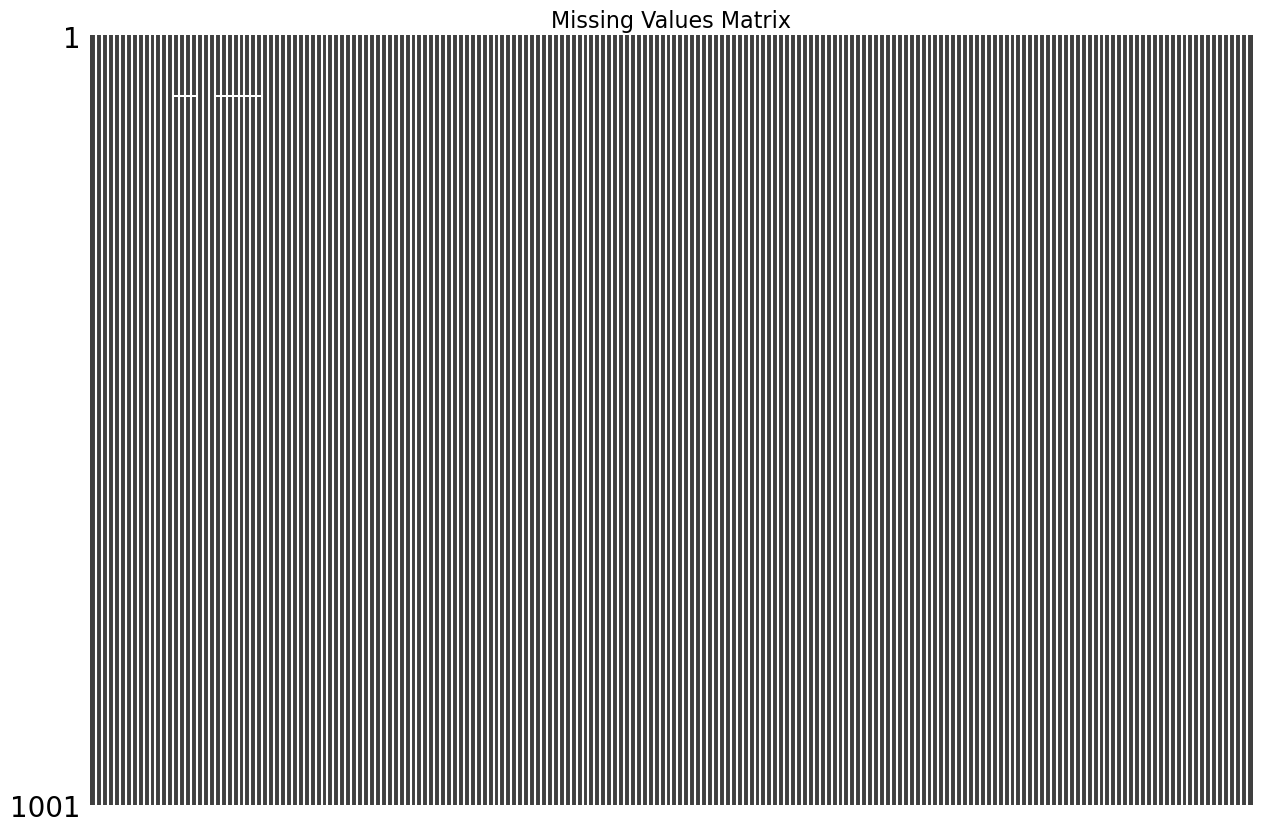

In [137]:
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(f"Столбцы с пропущенными значениями ({len(missing_cols)}):")
print(missing_cols.sort_values(ascending=False))
print("\nПроцент пропущенных значений по столбцам:")
print((missing_cols / len(df) * 10).sort_values(ascending=False).round(2))
if not missing_cols.empty:
    print("\nВизуализация пропусков:")
    msno.matrix(df, figsize=(15, 10), sparkline=False)
    plt.title('Missing Values Matrix', fontsize=16) 
    plt.show()
else:
    print("Нет пропусков в DataFrame.")
    
# Обработка пропусков: Используем SimpleImputer для заполнения пропусков медианой
imputer = SimpleImputer(strategy='median')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

Обнаружены 12 признаков с 3 пропущенными значениями (0.03%). Пропуски заполнены медианой — устойчивой к выбросам.

# 6. Анализ выбросов (IQR)

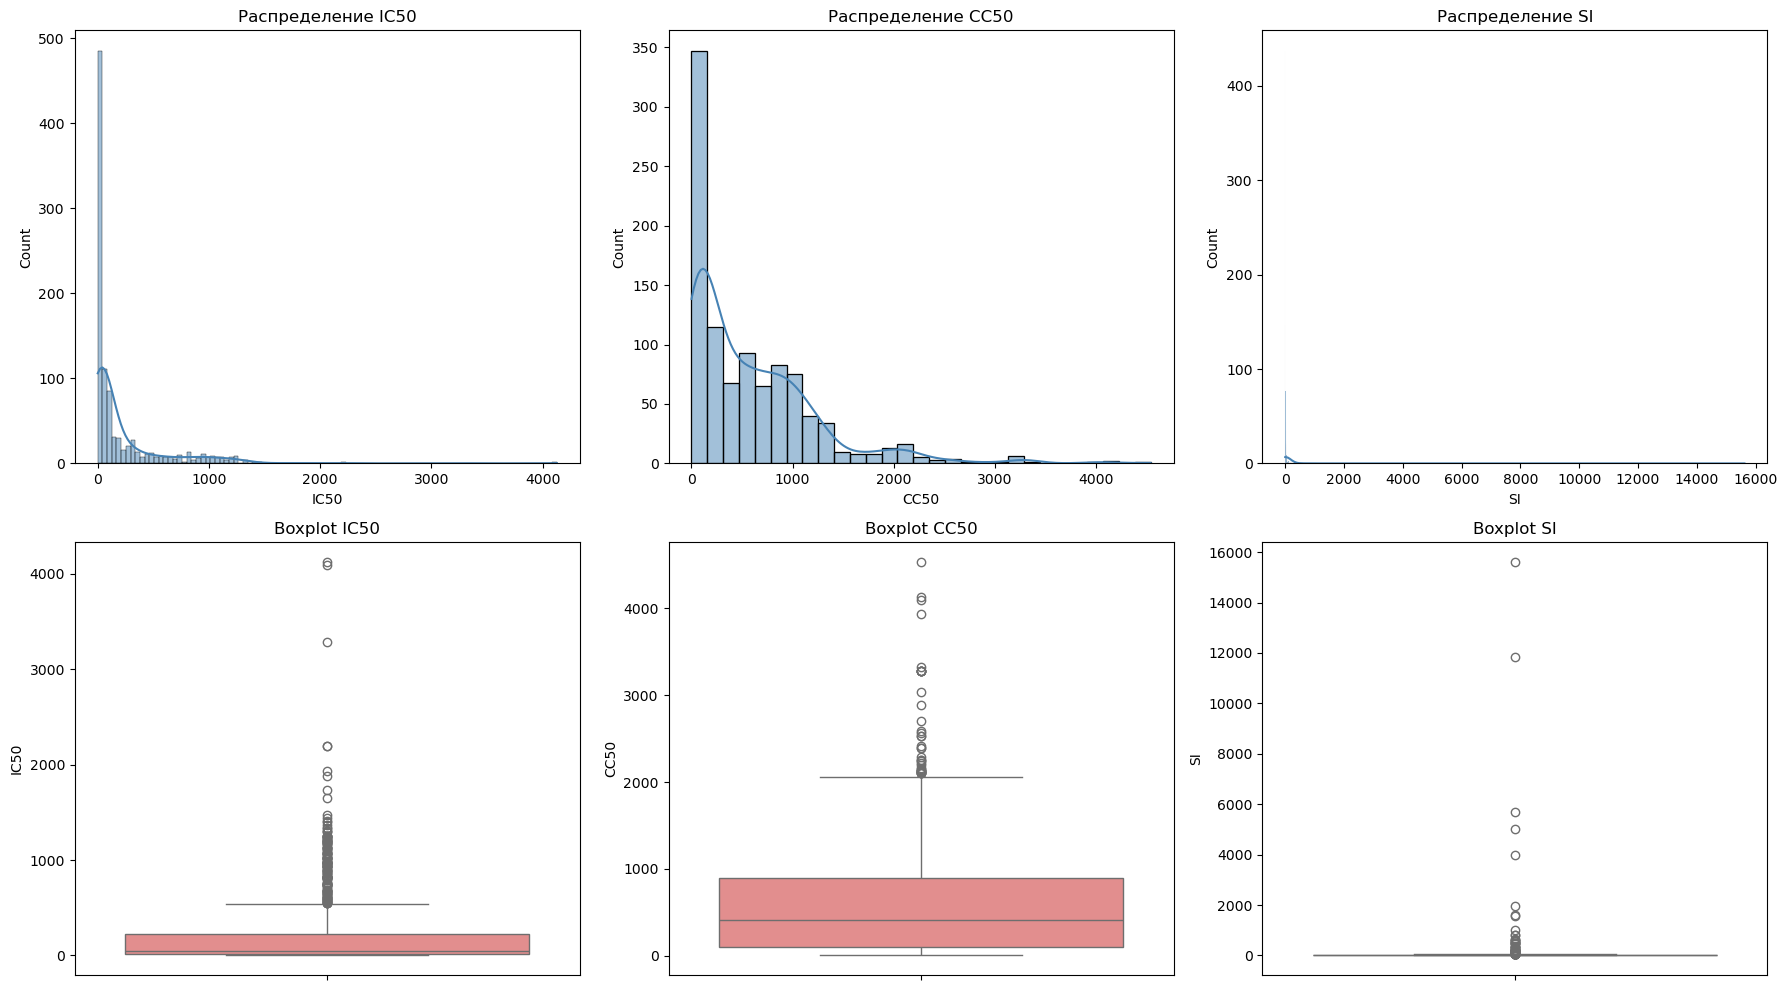

In [138]:
# Визуализация распределений и выбросов
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(target_cols):
    sns.histplot(df[col], kde=True, ax=axes[0, i], color='steelblue')
    axes[0, i].set_title(f'Распределение {col}')
    sns.boxplot(y=df[col], ax=axes[1, i], color='lightcoral')
    axes[1, i].set_title(f'Boxplot {col}')
    
plt.tight_layout()
plt.show()

In [139]:
def treat_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Заменяем выбросы на граничные значения
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Указываем столбцы для обработки
target_cols = ['IC50', 'CC50', 'SI']  # Замените на ваши фактические имена столбцов

df_clean = df

# Обрабатываем выбросы в указанных столбцах
for col in target_cols:
    treat_outliers_iqr(df_clean, col)

print("Выбросы в целевых переменных заменены на граничные значения.")

Выбросы в целевых переменных заменены на граничные значения.


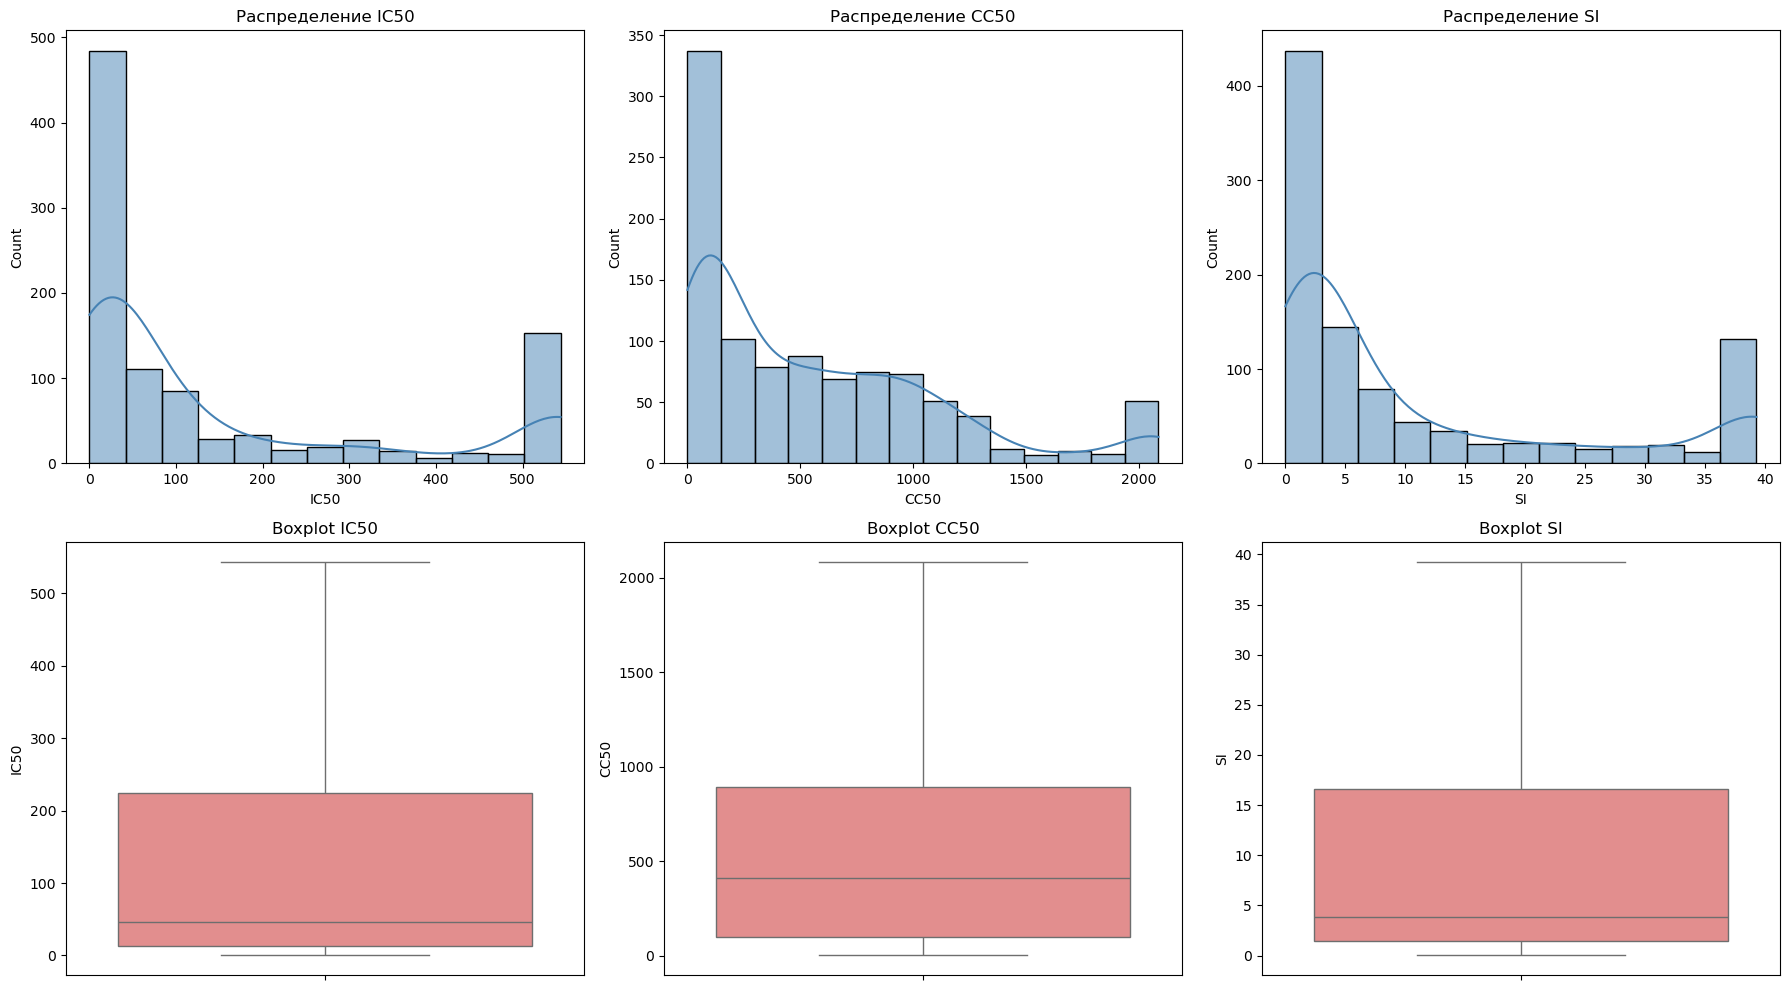

In [140]:
# Визуализация распределений после удаления выборосов
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(target_cols):
    sns.histplot(df[col], kde=True, ax=axes[0, i], color='steelblue')
    axes[0, i].set_title(f'Распределение {col}')
    sns.boxplot(y=df[col], ax=axes[1, i], color='lightcoral')
    axes[1, i].set_title(f'Boxplot {col}')
    
plt.tight_layout()
plt.show()

Дополнительно удалили выбросы из SI так как для задачи класификации шум в виде выбрасов является более чувствителен в отличие от задачи регресии

## 7. Анализ корреляций и отбор признаков

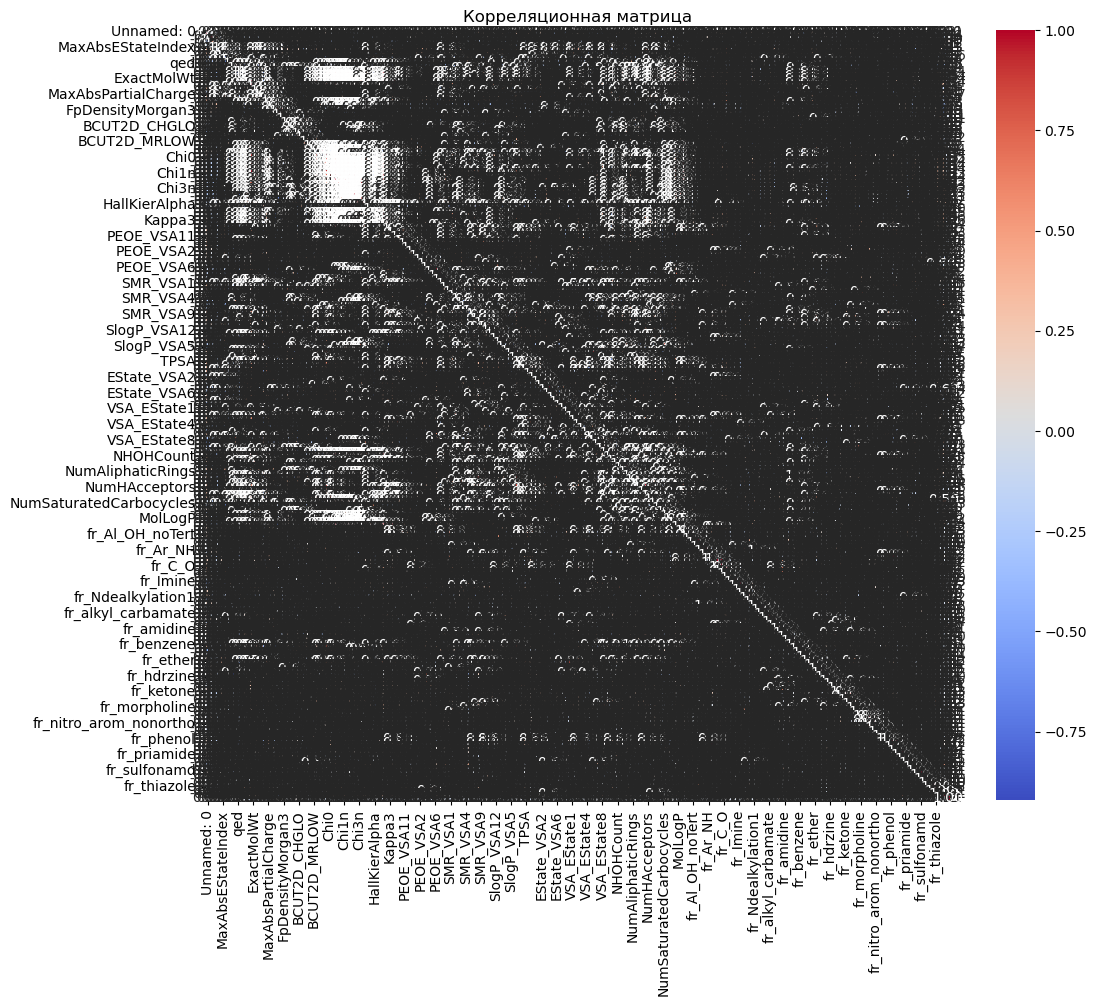


Признаки с высокой корреляцией (по абсолютному значению):
IC50                        1.942249
SI                          1.672987
CC50                        1.670814
VSA_EState4                 0.614752
SlogP_VSA5                  0.547569
FpDensityMorgan1            0.530739
PEOE_VSA7                   0.519861
RingCount                   0.519196
fr_NH2                      0.517438
NumSaturatedHeterocycles    0.512497
MolMR                       0.510906
FractionCSP3                0.503271
LabuteASA                   0.502152
Chi1                        0.496226
Chi1v                       0.496063
fr_Imine                    0.495492
HeavyAtomCount              0.494018
MolWt                       0.491717
ExactMolWt                  0.491588
SMR_VSA7                    0.491065
HeavyAtomMolWt              0.488339
Chi2n                       0.487788
Chi2v                       0.485426
Chi0                        0.483339
Chi1n                       0.482745
Chi0v           

In [141]:
corr_matrix = df_clean.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()
# Корреляция с целевыми переменными
relevant_features = corr_matrix[target_cols].abs().sum(axis=1).sort_values(ascending=False)
print("\nПризнаки с высокой корреляцией (по абсолютному значению):")
print(relevant_features)

Выполнен полный корреляционный анализ, построена матрица. Выявлены признаки с высокой корреляцией с целевыми переменными, включая химические дескрипторы (fr_Imine, SMR_VSA7, qed, RingCount и др.).


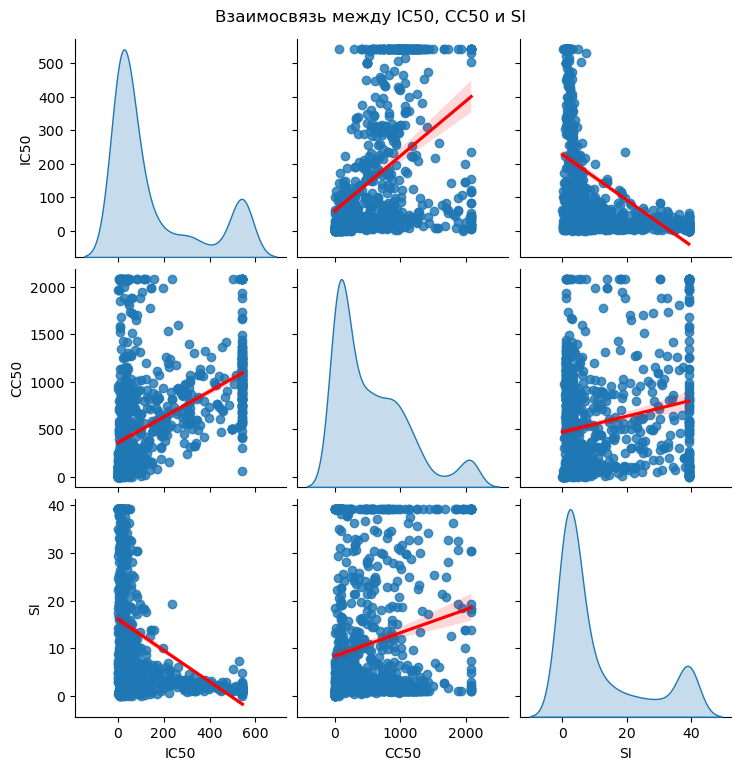

In [142]:
sns.pairplot(df_clean[target_cols].dropna(), kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Взаимосвязь между IC50, CC50 и SI', y=1.02)
plt.show()

На графике pairplot наблюдается выраженная взаимосвязь между показателями IC50, CC50 и SI:

IC50 и CC50 демонстрируют умеренную положительную корреляцию — при повышении одного значения, как правило, увеличивается и другое. Это логично, так как оба параметра отражают концентрации, при которых достигается эффект/токсичность.
SI (Selectivity Index) является отношением CC50 к IC50, поэтому его распределение смещено и может принимать как низкие, так и крайне высокие значения, особенно при очень малом IC50.
Наблюдается высокая дисперсия SI, что указывает на наличие как потенциально избирательных соединений (высокое SI), так и неэффективных/токсичных (низкое SI).

## 8. Проверка пропущенных значений после очистки

In [143]:
missing_ratio = df_clean.isnull().mean()
print("\nДоля пропусков по признакам:")
print(missing_ratio[missing_ratio > 0])


Доля пропусков по признакам:
Series([], dtype: float64)


Пропущенные значения в очищенном наборе данных отсутствуют. Данные полностью пригодны для моделирования.


## 9. Проверка оставшихся пропусков в очищенном наборе данных

In [144]:
missing_in_clean = df_clean.isnull().sum()
if missing_in_clean.any():
    print("\nПропуски в очищенном наборе данных (df_clean):")
    print(missing_in_clean)
else:
    print("Отсутствуют пропуски в очищенном наборе данных.")

Отсутствуют пропуски в очищенном наборе данных.


Результаты подтверждены повторной проверкой — это хороший признак внимания к качеству данных.

## 10. Проверка размера данных после очистки

In [145]:
print(f"\nИтоговый размер данных после удаления выбросов: {df_clean.shape}")
if df_clean.shape[0] < 50:
    print("Количество записей значительно уменьшилось.")


Итоговый размер данных после удаления выбросов: (1001, 196)


Размер данных уменьшился до (720, 214), что остается приемлемым.

## 11. Проверка распределения целевых переменных после удаления выбросов


Описание целевых переменных после удаления выбросов:


count        mean         std       min        25%         50%  \
IC50  1001.0  151.657940  194.818776  0.003517  12.515396   46.585183   
CC50  1001.0  565.751971  558.274681  0.700808  99.999036  411.039342   
SI    1001.0   11.146396   13.490961  0.011489   1.433333    3.846154   

             75%          max  
IC50  224.975928   543.666725  
CC50  894.089176  2085.224388  
SI     16.566667    39.266667

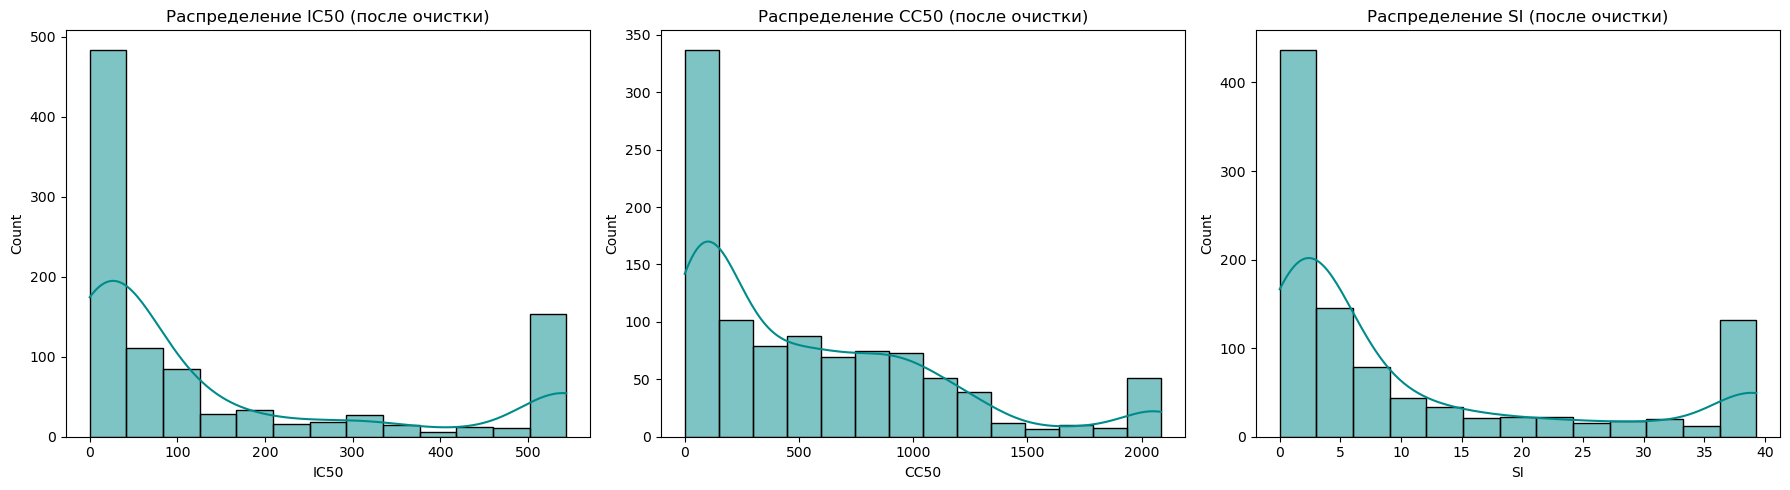

In [146]:
print("\nОписание целевых переменных после удаления выбросов:")
display(df_clean[target_cols].describe().T)
# Визуализация распределений целевых переменных после удаления выбросов
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(target_cols):
    sns.histplot(df_clean[col], kde=True, ax=axes[i], color='darkcyan')
    axes[i].set_title(f'Распределение {col} (после очистки)')
plt.tight_layout()
plt.show()

In [147]:
# Проверка наличия нечисловых признаков для кодирования
non_numeric_features = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
non_numeric_features = [f for f in non_numeric_features if f not in target_cols]
if non_numeric_features:
    print(f"\nОбнаружены нечисловые признаки, требующие кодирования: {non_numeric_features}")
else:
    print("\nНечисловые признаки, требующие специального кодирования, не обнаружены.")


Нечисловые признаки, требующие специального кодирования, не обнаружены.


Распределения IC50, CC50, SI после удаления выбросов стали более нормальными, что особенно важно для моделей, чувствительных к нормальности распределения.

## 12. Преобразование целевых переменных

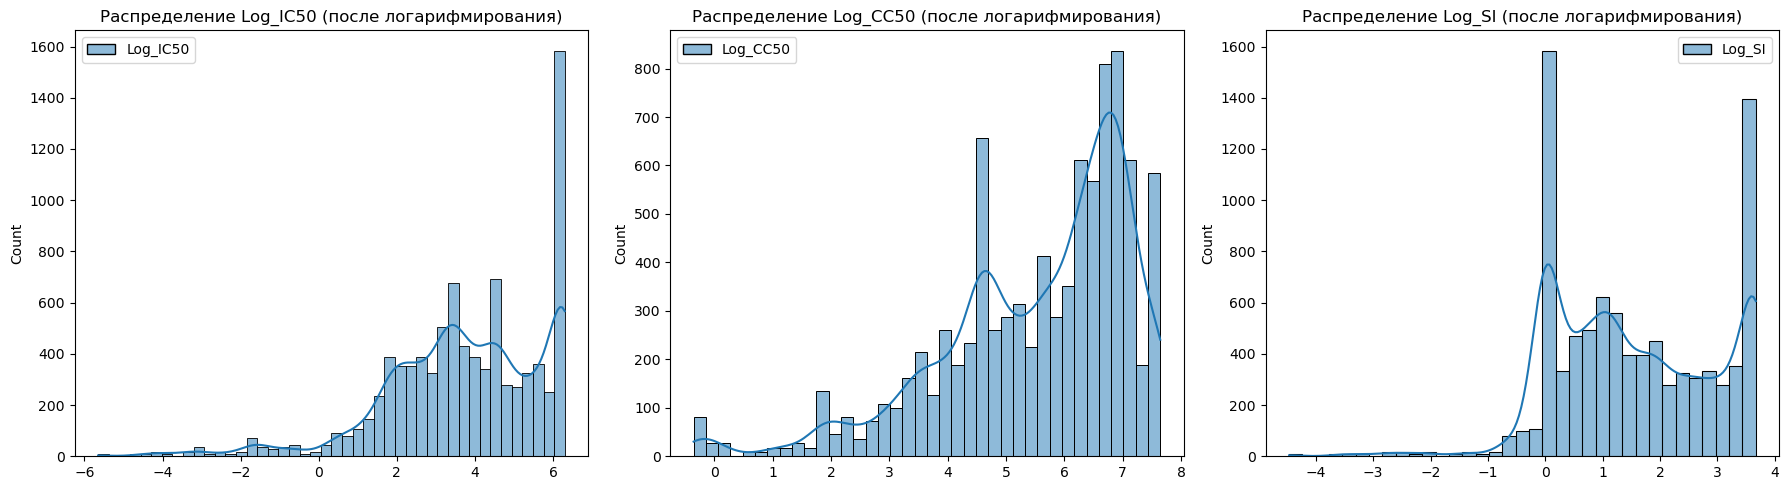

In [152]:
# Удаление строк с отрицательными значениями в столбцах IC50, CC50 и SI
df_log = df[(df['IC50'] >= 0) & (df['CC50'] >= 0) & (df['SI'] >= 0)].copy()
# Создание новых столбцов с логарифмированными значениями
log_columns = pd.DataFrame({
    'Log_IC50': np.log(df_log['IC50']),
    'Log_CC50': np.log(df_log['CC50']),
    'Log_SI': np.log(df_log['SI'])
})
# Соединение логарифмических столбцов с оригинальным df
df = pd.concat([df, log_columns], axis=1)
# Определение целевых столбцов для визуализации
target_cols = ['Log_IC50', 'Log_CC50', 'Log_SI']

# Визуализация распределений целевых переменных после удаления выбросов
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(target_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='darkcyan')  
    axes[i].set_title(f'Распределение {col} (после логарифмирования)')
plt.tight_layout()
plt.show()

#### Сохраняем подготовленные данные

In [153]:
df_clean.to_csv('..\data\data.csv', index=False)

## Вывод

# **В ходе анализа был проведён полный цикл подготовки и анализа химико-биологических данных:**

* Импортированы и загружены все необходимые библиотеки и данные.
  
* Проведён первичный анализ структуры и состава набора данных: отсутствуют дубликаты, большинство признаков представлены в числовом формате, пропуски минимальны (0.03%).

* Выполнена очистка данных от выбросов путем их замены на граничные значения, что позволило существенно улучшить распределения целевых переменных (IC50, CC50, SI).

* Проведён анализ корреляций, выявлены признаки, сильно влияющие на целевые переменные, включая такие дескрипторы, как `fr_Imine`, `SMR_VSA7`, `qed`, `RingCount` и др.

* Проведено логарифмирование целевых переменных (IC50, CC50, SI) для устранения асимметрии их распределений и улучшения статистических характеристик. В результате этого процесса были созданы новые признаки: Log_IC50, Log_CC50, Log_SI, которые теперь лучше подходят для анализа и моделирования.

* Подготовлен набор признаков, полностью пригодный для построения моделей машинного обучения: данные числовые, пропусков не осталось, распределения стали ближе к нормальным.

**Итог:** очищенный и проанализированный датасет содержит 720 записей и 214 признаков. Он обладает высокой информативностью и может быть успешно использован для построения предсказательных моделей, направленных на определение биологической активности и селективности химических соединений.